In [2]:
## Loading the tensorflow versions   
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0-rc1


In [0]:
## Setting a random seed
tf.random.set_seed(42)

In [4]:
## Mounting the drive to access the files
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
## Loading the necessary library packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import accuracy_score
from sklearn import metrics
import h5py

In [0]:
## Opening the h5 file to load the com=ntents 
svhn= h5py.File('/content/gdrive/My Drive/AIML/SVHN_single_grey1.h5','r')

In [7]:
## Displaying the key columns in the file
print(list(svhn.keys()))

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


In [0]:
## Loading the keys into respective Train, test and Validation set for our analysis
X_train=svhn['X_train'][:]
X_test=svhn['X_test'][:]
y_train=svhn['y_train'][:]
y_test=svhn['y_test'][:]
X_val=svhn['X_val'][:]
y_val=svhn['y_val'][:]

In [0]:
## Closing the h5 file as we have loaded the items
svhn.close()

In [10]:
## Printing the shape of Train, test and Validation set
print('X_train Dimensions:',X_train.shape)
print('y_train Dimensions:',y_train.shape)
print('X_test Dimensions:',X_test.shape)
print('y_test Dimensions:',y_test.shape)
print('X_val Dimensions:',X_val.shape)
print('y_val Dimensions:',y_val.shape)

X_train Dimensions: (42000, 32, 32)
y_train Dimensions: (42000,)
X_test Dimensions: (18000, 32, 32)
y_test Dimensions: (18000,)
X_val Dimensions: (60000, 32, 32)
y_val Dimensions: (60000,)


In [11]:
X_train[0:1]

array([[[ 33.0704,  30.2601,  26.852 , ...,  71.4471,  58.2204,
          42.9939],
        [ 25.2283,  25.5533,  29.9765, ..., 113.0209, 103.3639,
          84.2949],
        [ 26.2775,  22.6137,  40.4763, ..., 113.3028, 121.775 ,
         115.4228],
        ...,
        [ 28.5502,  36.212 ,  45.0801, ...,  24.1359,  25.0927,
          26.0603],
        [ 38.4352,  26.4733,  23.2717, ...,  28.1094,  29.4683,
          30.0661],
        [ 50.2984,  26.0773,  24.0389, ...,  49.6682,  50.853 ,
          53.0377]]], dtype=float32)

In [12]:
y_train[0:2]

array([2, 6], dtype=uint8)

In [0]:
## Doing a train test split in ratio of 70:30 as training and validation set
xtrain,xval,ytrain,yval = train_test_split(X_train, y_train, test_size=0.30, random_state=50)

In [14]:
print('xtrain Dimensions:',xtrain.shape)
print('ytrain Dimensions:',ytrain.shape)
print('xval Dimensions:',xval.shape)
print('yval Dimensions:',yval.shape)

xtrain Dimensions: (29400, 32, 32)
ytrain Dimensions: (29400,)
xval Dimensions: (12600, 32, 32)
yval Dimensions: (12600,)


In [0]:
## Normalising the features to be around to 0 to 1
xtrain = xtrain / 255
X_test = X_test / 255
xval = xval / 255

In [0]:
## Reshaping the data from 3D to 2D
xtrain=np.reshape(xtrain,(-1,1024))
X_test=np.reshape(X_test,(-1,1024))
xval=np.reshape(xval,(-1,1024))

In [17]:
print('xtrain Dimensions:',xtrain.shape)
print('X_test Dimensions:',X_test.shape)
print('xval Dimensions:',xval.shape)

xtrain Dimensions: (29400, 1024)
X_test Dimensions: (18000, 1024)
xval Dimensions: (12600, 1024)


# Build the KNN model using Train Dataset


In [18]:
## Defining KNN Model
KNN=KNeighborsClassifier()
KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [19]:
# Call Nearest Neighbour algorithm and is being build on Train dataset
KNN.fit(xtrain, ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
maximum_k=int(np.sqrt(xval.shape[0]))

In [22]:
## Trying to find optimal K value
optimalK = 3
a=[3,5,7,9,11]
optimalAccuracy = 0
for k_i in a:
    if(((k_i % 2) != 0) & (k_i > 1)):
        KNN = KNeighborsClassifier(n_neighbors=k_i)
        KNN.fit(xval, yval)
        if(KNN.score(xval, yval) > optimalAccuracy):
            optimalK = k_i
            optimalAccuracy = KNN.score(xval, yval)
print((optimalK, optimalAccuracy))

(3, 0.6481746031746032)


In [21]:
#K-Neighbours algorithm is being build on with neighbors=3 and accuracy is tested on test data.
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(xtrain, ytrain)
print('Validation Set Score:' ,KNN.score(xval, yval))
print('Test Set Score:' , KNN.score(X_test, y_test))

Validation Set Score: 0.43857142857142856
Test Set Score: 0.4383888888888889


In [23]:
print('Validation Confusion matrix :', metrics.confusion_matrix(yval, KNN.predict(xval)))
print('Test Confusion matrix :', metrics.confusion_matrix(y_test, KNN.predict(X_test)))

Validation Confusion matrix : [[789  44  32  38  29  32  78  32  48  89]
 [ 80 888  53  44  72  24  28  51  14  26]
 [100 153 684  96  37  36  26  85  45  48]
 [128 200 117 520  35 100  40  44  59  46]
 [100 189  46  53 733  23  28  10  24  41]
 [164 134  54 191  37 436 112  16  79  63]
 [277  82  25  36  95  96 400  16 136  45]
 [ 91 187  98  68  21  21  25 677  19  38]
 [265  91  60  86  57  90 170  15 355  76]
 [303  96  56  78  51  57  58  37 100 423]]
Test Confusion matrix : [[1192   60   48   36   50   53  117   36  102  120]
 [ 121 1240   74   83  100   33   38   71   24   44]
 [ 139  251  903  137   54   33   30  119   52   85]
 [ 174  252  166  669   65  140   43   52   89   69]
 [ 135  266   72   71 1069   25   58   24   45   47]
 [ 213  170   97  270   58  576  142   41  110   91]
 [ 378  116   52   78  137  136  659   19  197   60]
 [ 126  245  157   98   39   30   24 1000   39   50]
 [ 347  136   80  145   84  112  240   25  531  112]
 [ 415  138   85  110   60  103   77  

In [24]:
print(classification_report(yval, (KNN.predict(xval)).astype(int)))
print(classification_report(y_test, (KNN.predict(X_test)).astype(int)))

              precision    recall  f1-score   support

           0       0.34      0.65      0.45      1211
           1       0.43      0.69      0.53      1280
           2       0.56      0.52      0.54      1310
           3       0.43      0.40      0.42      1289
           4       0.63      0.59      0.61      1247
           5       0.48      0.34      0.40      1286
           6       0.41      0.33      0.37      1208
           7       0.69      0.54      0.61      1245
           8       0.40      0.28      0.33      1265
           9       0.47      0.34      0.39      1259

    accuracy                           0.47     12600
   macro avg       0.48      0.47      0.46     12600
weighted avg       0.49      0.47      0.46     12600

              precision    recall  f1-score   support

           0       0.37      0.66      0.47      1814
           1       0.43      0.68      0.53      1828
           2       0.52      0.50      0.51      1803
           3       0.39 

## **Neural Network Model**



In [21]:
np.unique(ytrain)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [0]:
ytrain = tf.keras.utils.to_categorical(ytrain, num_classes=10)
yval = tf.keras.utils.to_categorical(yval, num_classes=10)

In [23]:
ytrain.shape

(29400, 10)

Simple Neural Network with Sigmoid activation and sgd optimiser



In [29]:
## Creating a sequential model
model = tf.keras.models.Sequential()

# Add another Dense Layer which has 110 neurons and applying sigmoid activation
model.add(tf.keras.layers.Dense(110, input_shape=(1024,), activation='sigmoid'))

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
model.add(tf.keras.layers.Dropout(rate=0.05))

# Add another Dense Layer which has 110 neurons and applying sigmoid activation
model.add(tf.keras.layers.Dense(50, activation='sigmoid'))

# Add output Dense Layer which has 1 neuron which provides final binary output and applying sigmoid activation
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

## Summarising the model
model.summary()

## Fitting the model on train data and validating it on the test data with 50 epochs
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(xtrain, ytrain, validation_data=(xval, yval),epochs=50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 110)               112750    
_________________________________________________________________
dropout_2 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 50)                5550      
_________________________________________________________________
dense_8 (Dense)              (None, 10)                510       
Total params: 118,810
Trainable params: 118,810
Non-trainable params: 0
_________________________________________________________________
Train on 29400 samples, validate on 12600 samples
Epoch 1/50
29400/29400 [==============================] - 4s 121us/sample - loss: 2.3107 - accuracy: 0.0979 - val_loss: 2.3027 - val_accuracy: 0.1006
Epoch 2/50
29400/29400 [======================

Simple Neural Network with Sigmoid activation and adam optimiser

In [30]:
## Creating a sequential model
Model = tf.keras.models.Sequential()

# Add Dense Layer which has 110 neurons and applying sigmoid activation 
Model.add(tf.keras.layers.Dense(220,input_shape=(1024,), activation='sigmoid'))

# Add another Dense Layer which has 110 neurons and applying sigmoid activation
Model.add(tf.keras.layers.Dense(110, activation='sigmoid'))

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
Model.add(tf.keras.layers.Dropout(rate=0.05))

# Add another Dense Layer which has 110 neurons and applying sigmoid activation
Model.add(tf.keras.layers.Dense(50, activation='sigmoid'))

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
Model.add(tf.keras.layers.Dropout(rate=0.05))

# Add output Dense Layer which has 10 neuron which provides final binary output and applying sigmoid activation
Model.add(tf.keras.layers.Dense(10, activation='sigmoid'))

## Summarising the model
Model.summary()

## Fitting the model on train data and validating it on the test data with 50 epochs
Model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
Model.fit(xtrain, ytrain, validation_data=(xval, yval),epochs=50)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 220)               225500    
_________________________________________________________________
dense_10 (Dense)             (None, 110)               24310     
_________________________________________________________________
dropout_3 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 50)                5550      
_________________________________________________________________
dropout_4 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                510       
Total params: 255,870
Trainable params: 255,870
Non-trainable params: 0
________________________________________________

Deep Neural Network with Relu activation and sgd optimiser with learning rate

In [0]:
## Creating a sequential model
model1 = tf.keras.models.Sequential()
# Add Dense Layer which has 110 neurons and applying relu activation
model1.add(tf.keras.layers.Dense(220,input_shape=(1024,), activation='relu'))

# Normalize the data
model1.add(tf.keras.layers.BatchNormalization())

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
model1.add(tf.keras.layers.Dropout(rate=0.05))

# Add another Dense Layer which has 110 neurons and applying relu activation
model1.add(tf.keras.layers.Dense(110, activation='relu'))

## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
model1.add(tf.keras.layers.Dropout(rate=0.05))

# Add another Dense Layer which has 110 neurons and applying relu activation
model1.add(tf.keras.layers.Dense(50, activation='relu'))


## Adding a droupout rate of 5% so that during each epoch some neurons are dropped so that each and every neuron are trained with the data atleast once
model1.add(tf.keras.layers.Dropout(rate=0.05))

# Add output Dense Layer which has 1 neuron which provides final binary output and applying sigmoid activation
model1.add(tf.keras.layers.Dense(10, activation='sigmoid'))

In [32]:
## Summarising the model
model1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 220)               225500    
_________________________________________________________________
batch_normalization (BatchNo (None, 220)               880       
_________________________________________________________________
dropout_5 (Dropout)          (None, 220)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 110)               24310     
_________________________________________________________________
dropout_6 (Dropout)          (None, 110)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 50)                5550      
_________________________________________________________________
dropout_7 (Dropout)          (None, 50)               

In [0]:
## Initialising a learning rate to have a optimal gradient descent ( acceptable range of minimium error)
from tensorflow.keras.optimizers import SGD
learning_rate=0.03
sgd = SGD(lr=learning_rate)

In [34]:
## Fitting the model on train data and validating it on the test data with 50 epochs
model1.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
history=model1.fit(xtrain, ytrain, validation_data=(xval, yval),epochs=50)

Train on 29400 samples, validate on 12600 samples
Epoch 1/50
29400/29400 [==============================] - 6s 209us/sample - loss: 2.0124 - accuracy: 0.2900 - val_loss: 1.7950 - val_accuracy: 0.3586
Epoch 2/50
29400/29400 [==============================] - 5s 160us/sample - loss: 1.6058 - accuracy: 0.4546 - val_loss: 2.8096 - val_accuracy: 0.2378
Epoch 3/50
29400/29400 [==============================] - 5s 172us/sample - loss: 1.5477 - accuracy: 0.4768 - val_loss: 1.6678 - val_accuracy: 0.4446
Epoch 4/50
29400/29400 [==============================] - 5s 179us/sample - loss: 1.4284 - accuracy: 0.5296 - val_loss: 3.2298 - val_accuracy: 0.2418
Epoch 5/50
29400/29400 [==============================] - 5s 173us/sample - loss: 1.3325 - accuracy: 0.5700 - val_loss: 2.6691 - val_accuracy: 0.3097
Epoch 6/50
29400/29400 [==============================] - 5s 171us/sample - loss: 1.3300 - accuracy: 0.5725 - val_loss: 1.5992 - val_accuracy: 0.4761
Epoch 7/50
29400/29400 [==========================

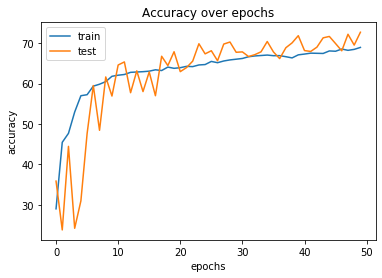

In [35]:
plt.plot(np.array(history.history['accuracy']) * 100)
plt.plot(np.array(history.history['val_accuracy']) * 100)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train', 'test'])
plt.title('Accuracy over epochs')
plt.show()


In [0]:
## Predicting the values of target variable using the model built
y_pred = model1.predict(X_test)

In [37]:
y_pred

array([[2.8017797e-02, 1.7978473e-02, 5.6344657e-03, ..., 2.1410011e-02,
        1.7380819e-02, 1.0603510e-02],
       [5.3916137e-05, 8.4833933e-05, 1.0220905e-02, ..., 1.5678641e-03,
        4.7757101e-05, 1.4554093e-05],
       [9.2310336e-05, 1.1590973e-04, 8.0328897e-02, ..., 2.1196659e-04,
        2.3077744e-04, 1.5132247e-04],
       ...,
       [6.0126692e-04, 1.2009291e-02, 1.4514205e-03, ..., 6.8800166e-02,
        1.3758823e-04, 4.7939637e-04],
       [3.0034690e-03, 5.5485880e-03, 3.8863590e-03, ..., 3.6012582e-03,
        2.9917255e-02, 1.3249975e-01],
       [1.2373332e-04, 3.3234315e-05, 5.4767128e-02, ..., 1.4897849e-04,
        3.9910701e-05, 1.9012448e-05]], dtype=float32)

[[1371   97   20   16   58   11   70   45   30   96]
 [  68 1478   25   45   64   23   17   62   18   28]
 [  25   99 1302   34   51   30   26  143   35   58]
 [  42  170   37 1131   44  126   15   81   34   39]
 [  58   84   35   28 1440   23   60   19   23   42]
 [  68  109   39  128   38 1170   76   41   45   54]
 [  80   58   32   23  102   69 1319   31   80   38]
 [  32  146   93   25   27   17   22 1401   13   32]
 [  62  118   29   39   82   60  119   40 1176   87]
 [  98   94   48   55   67   48   18   48   77 1251]]


Text(0.5, 24.0, 'Predicted')

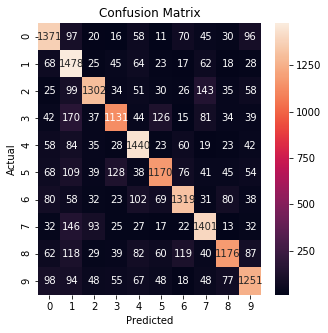

In [38]:
## Printing the confusion matrix to find the total number of correctly predicted results
cm = confusion_matrix(y_test, y_pred.argmax(axis=1))
print(cm)
plt.figure(figsize = (5,5))
plt.title("Confusion Matrix")
sns.heatmap(cm,annot=True,fmt='g')
plt.ylabel("Actual")
plt.xlabel("Predicted")

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.72      0.76      0.74      1814
           1       0.60      0.81      0.69      1828
           2       0.78      0.72      0.75      1803
           3       0.74      0.66      0.70      1719
           4       0.73      0.79      0.76      1812
           5       0.74      0.66      0.70      1768
           6       0.76      0.72      0.74      1832
           7       0.73      0.77      0.75      1808
           8       0.77      0.65      0.70      1812
           9       0.73      0.69      0.71      1804

    accuracy                           0.72     18000
   macro avg       0.73      0.72      0.72     18000
weighted avg       0.73      0.72      0.72     18000



**From the above two models being analysed on the dataset**

It is observed that

1) Traditional models like KNN are taking a very longer time to execute the image type datsets and accuracy is found to be very low of 44% compared to the neural networks.

2) Speed and computational capability are high for neural networks and accuracy is found to be around 72%.

